Based on the code shown in https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_sift.html

In [3]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import SIFT, match_descriptors, plot_matched_features
from skimage import transform
from PIL import Image
import numpy as np
import os
import cv2
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform

In [4]:
# Load the datafiles and make them grayscale
def load_image(path):
    return rgb2gray(np.array(Image.open(path)))

In [5]:
# Used to acces the name of the folder we are working on : not necessary
print("Répertoire courant :", os.getcwd())


Répertoire courant : c:\Users\emmar\OneDrive\Polytech\I5\Semestre 9 - Oslo\Data Mining\Exercices\Day 5\Augmented_reality_system\src


In [6]:
# Extract SIFT keypoints and descriptors
def extract_sift_features(image):
    sift = SIFT()
    sift.detect_and_extract(image)
    return sift.keypoints, sift.descriptors

Problem of dimensions for the first two pictures.

In [7]:
def resize_to_match(img1, img2):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    return cv2.resize(img2, (w1, h1)) if (h1 != h2 or w1 != w2) else img2

In [8]:
# Visualize the matches
def match_and_plot(img1, img2, keypoints1, descriptors1, keypoints2, descriptors2, title):
    matches = match_descriptors(descriptors1, descriptors2, max_ratio=0.6, cross_check=True)

    #img2 = resize_to_match(img1, img2)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plt.gray()
    plot_matched_features(image0=img1, image1=img2, 
                          keypoints0=keypoints1, keypoints1=keypoints2,
                          matches=matches, ax=ax, 
                          keypoints_color='cyan',
                          only_matches=True)
    ax.axis('off')
    ax.set_title(title)
    plt.show()
    return matches

In [9]:
# Compute matching accuracy using optional homography
def compute_matching_accuracy(keypoints1, keypoints2, descriptors1, descriptors2, homography=None, threshold=5):
    """
    Compute the matching accuracy based on a homography.
    If no homography is provided, only the number of matches is printed.
    """
    matches = match_descriptors(descriptors1, descriptors2, max_ratio=0.6, cross_check=True)
    if homography is None:
        print(f"{len(matches)} matches found (no validation)")
        return None

    correct = 0
    for i, j in matches:
        pt1 = np.array([*keypoints1[i], 1.0])  # homogeneous coordinates
        projected = homography @ pt1
        projected /= projected[2]  # normalize

        pt2 = keypoints2[j]
        error = np.linalg.norm(projected[:2] - pt2)

        if error < threshold:
            correct += 1

    accuracy = correct / len(matches) if matches.size > 0 else 0
    print(f"Matching Accuracy: {accuracy:.2%} ({correct}/{len(matches)} correct matches)")
    return accuracy, matches

In [8]:
def create_homography(keypoints1, keypoints2, matches):
    """
    Create a homography matrix from source points to destination points.
    """

    if matches.shape[0] < 4:
        print(f"Not enough matches to estimate homography: {matches.shape[0]} found")
        return None
    
    src = keypoints1[matches[:, 0]]  # points from image 1
    dst = keypoints2[matches[:, 1]]  # corresponding points in image 2

    model_robust, inliers = ransac(
        (src, dst),
        ProjectiveTransform,
        min_samples=4,
        residual_threshold=2,
        max_trials=1000
    )
    H = model_robust.params 
    return H


In [10]:
img1 = load_image('../data/images/city_hall/city_hall1.jpg')
img2 = load_image('../data/images/city_hall/city_hall2.jpg')
im_test = load_image('../city_hall_test.jpg')

keypoints1, descriptors1 = extract_sift_features(img1)
keypoints2, descriptors2 = extract_sift_features(img2)
keypoints_test, descriptors_test = extract_sift_features(im_test)

KeyboardInterrupt: 

In [ ]:
#matches = match_and_plot(img1, im_test, keypoints1, descriptors1, keypoints_test, descriptors_test, "Image 1 vs Image test")
H1, matches = create_homography(keypoints1, keypoints_test, descriptors1, descriptors_test)
print(f"Accurcay of Image 1 vs Image test : {compute_matching_accuracy(keypoints1, keypoints_test, matches, H1)}")

In [ ]:
#matches = match_and_plot(img2, im_test, keypoints2, descriptors2, keypoints_test, descriptors_test, "Image 2 vs Image test")
H2, matches = create_homography(keypoints2, keypoints_test, descriptors2, descriptors_test)
print(f"Accurcay of Image 2 vs Image test : {compute_matching_accuracy(keypoints1, keypoints_test, matches, H2)}")

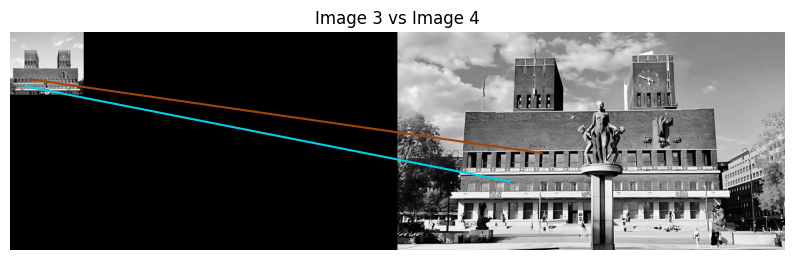

Not enough matches to estimate homography: 2 found
2 matches found (no validation)
Accurcay of Image 3 vs Image 4 : None


In [ ]:
img3 = load_image('../data/images/city_hall/city_hall3.jpeg')
img4 = load_image('../data/images/city_hall/city_hall4.jpg')

keypoints3, descriptors3 = extract_sift_features(img3)
keypoints4, descriptors4 = extract_sift_features(img4)



In [ ]:
H3, matches = create_homography(keypoints3, keypoints_test, descriptors3, descriptors_test)
print(f"Accurcay of Image 3 vs Image test : {compute_matching_accuracy(keypoints3, keypoints_test, matches, H3)}")

In [ ]:
H4, matches = create_homography(keypoints4, keypoints_test, descriptors4, descriptors_test)
print(f"Accurcay of Image 4 vs Image test : {compute_matching_accuracy(keypoints4, keypoints_test, matches, H4)}")

Test with the others images.

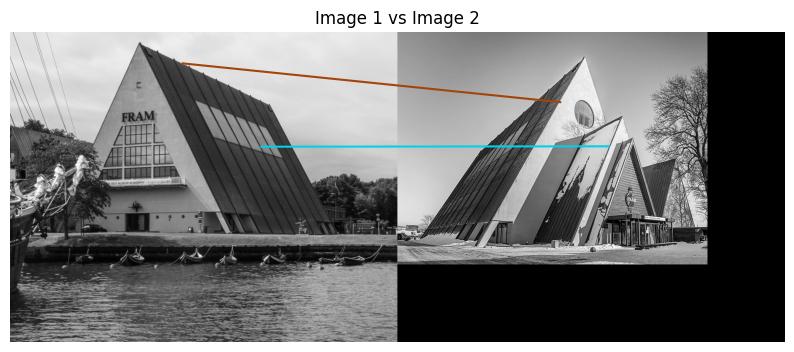

Not enough matches to estimate homography: 1 found
1 matches found (no validation)
Accurcay of Image 1 vs Image 2 : None


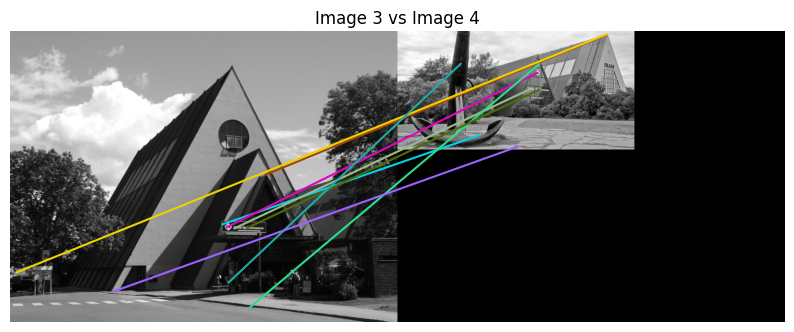

Matching Accuracy: 44.44% (4/9 correct matches)
Accurcay of Image 3 vs Image 4 : 0.4444444444444444


KeyboardInterrupt: 

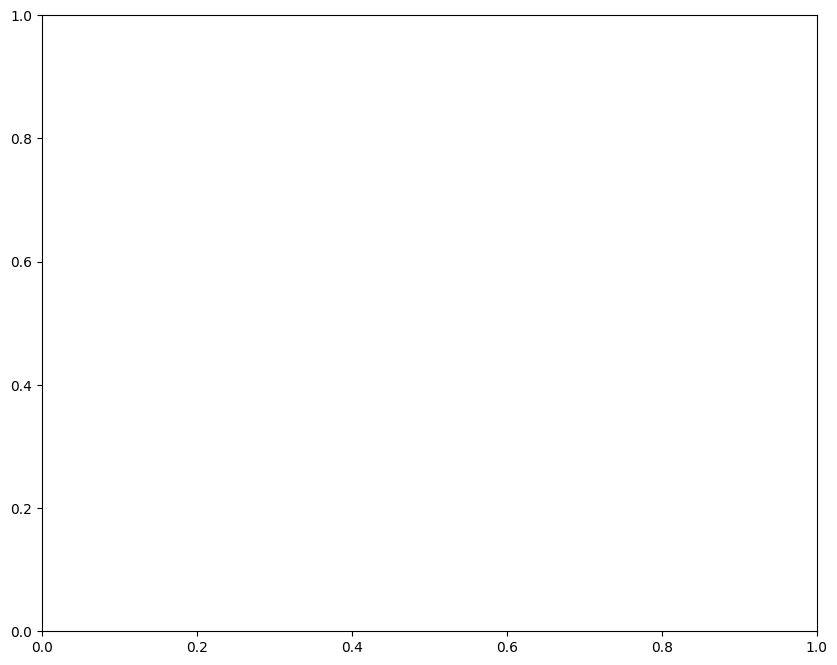

In [ ]:

img1 = load_image('../data/images/fram/fram1.png')
img2 = load_image('../data/images/fram/fram2.jpeg')

keypoints1, descriptors1 = extract_sift_features(img1)
keypoints2, descriptors2 = extract_sift_features(img2)

img3 = load_image('../data/images/fram/fram3.jpeg')
img4 = load_image('../data/images/fram/fram4.jpg')

keypoints3, descriptors3 = extract_sift_features(img3)
keypoints4, descriptors4 = extract_sift_features(img4)


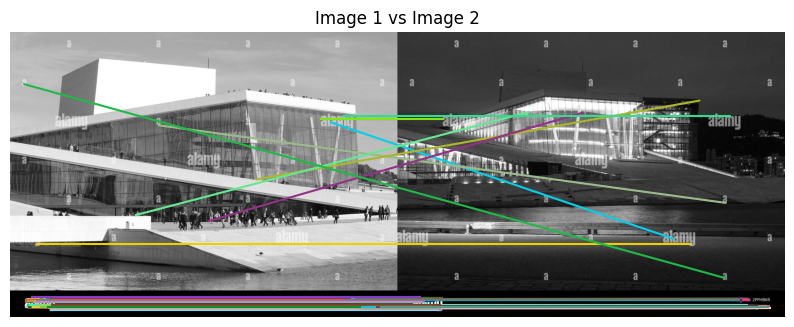

In [ ]:
img1 = load_image('../data/images/opera/opera1.jpg')
img2 = load_image('../data/images/opera/opera2.jpg')

keypoints1, descriptors1 = extract_sift_features(img1)
keypoints2, descriptors2 = extract_sift_features(img2)

img3 = load_image('../data/images/opera/opera3.jpeg')
img4 = load_image('../data/images/opera/opera4.jpg')

keypoints3, descriptors3 = extract_sift_features(img3)
keypoints4, descriptors4 = extract_sift_features(img4)

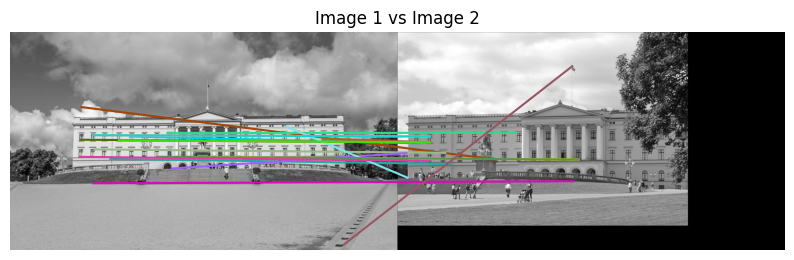

In [ ]:
img1 = load_image('../data/images/palace/palace1.jpg')
img2 = load_image('../data/images/palace/palace2.jpeg')

keypoints1, descriptors1 = extract_sift_features(img1)
keypoints2, descriptors2 = extract_sift_features(img2)

img3 = load_image('../data/images/palace/palace3.jpeg')
img4 = load_image('../data/images/palace/palace4.jpg')

keypoints3, descriptors3 = extract_sift_features(img3)
keypoints4, descriptors4 = extract_sift_features(img4)

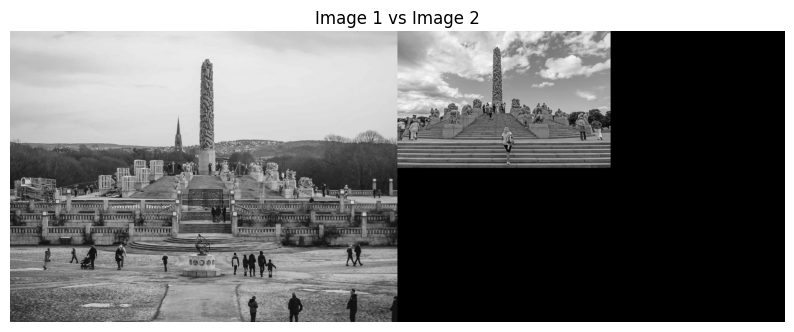

In [ ]:
img1 = load_image('../data/images/vigeland/vigeland1.jpg')
img2 = load_image('../data/images/vigeland/vigeland2.jpg')

keypoints1, descriptors1 = extract_sift_features(img1)
keypoints2, descriptors2 = extract_sift_features(img2)

img3 = load_image('../data/images/vigeland/vigeland3.jpg')
img4 = load_image('../data/images/vigeland/vigeland4.png')

keypoints3, descriptors3 = extract_sift_features(img3)
keypoints4, descriptors4 = extract_sift_features(img4)

Test that shouldn't return a lot of common points.

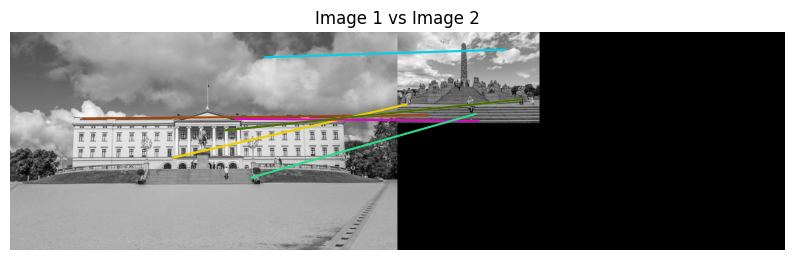

In [ ]:
img1 = load_image('../data/images/palace/palace1.jpg')
img2 = load_image('../data/images/vigeland/vigeland2.jpg')

keypoints1, descriptors1 = extract_sift_features(img1)
keypoints2, descriptors2 = extract_sift_features(img2)